In [226]:
'''Hi, This is a quick representation of our state covid-19 data (district wise) '''


import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [227]:
#reading the geospacial data of our state telangana(district wise)
geo_districts=gpd.read_file('Telangana_Districts Loc Data/District_Boundary.shp')

#this is the day wise district covid-19 records availabel at twitter handel of health ministry
dist_wise_data='Day_Wise_District_Data.xlsx'

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


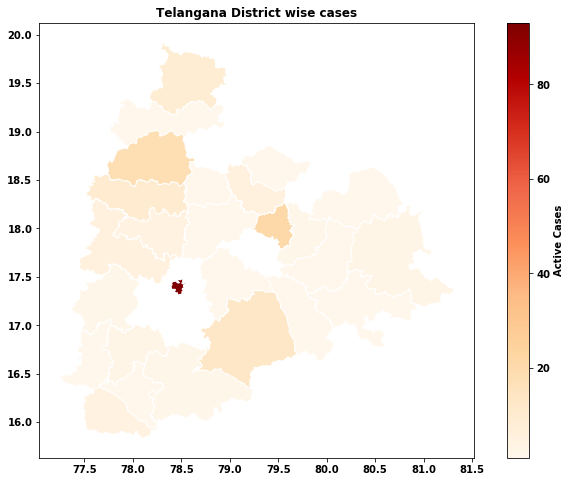

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


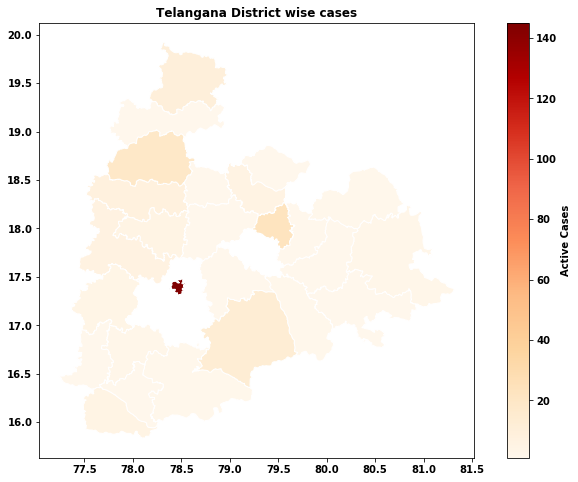

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


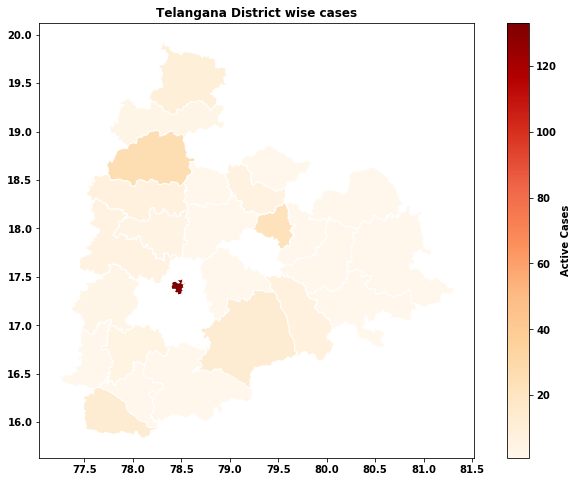

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


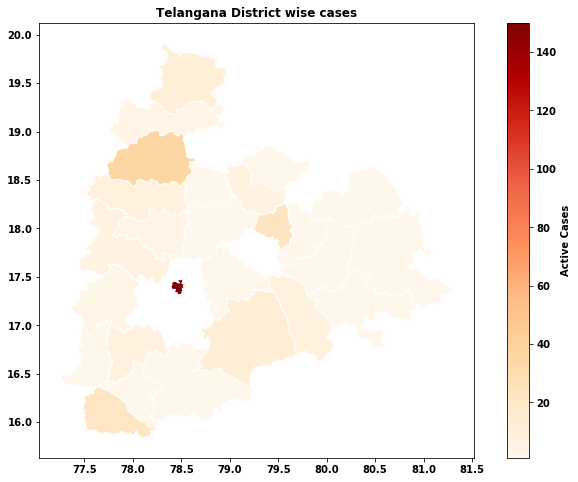

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


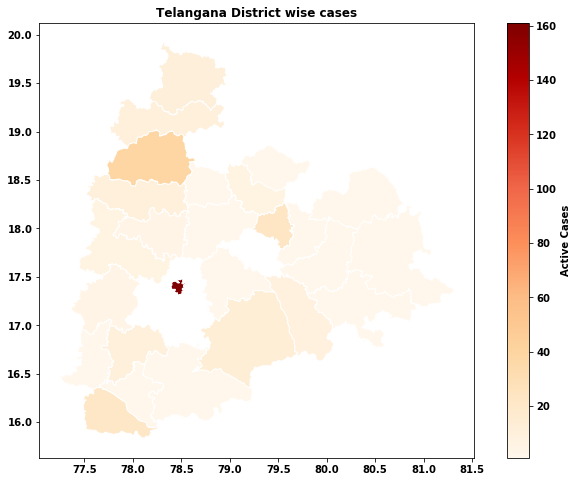

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


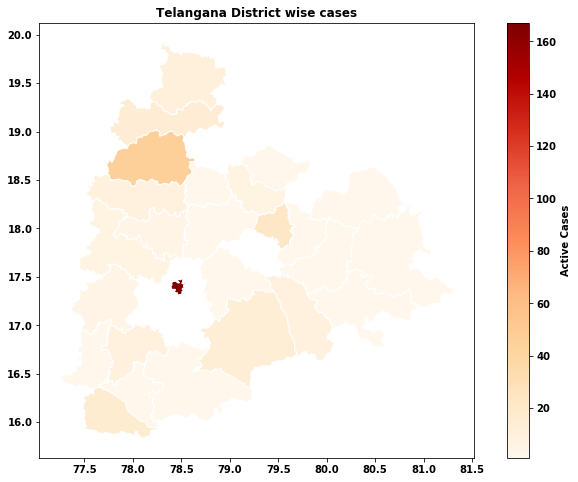

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


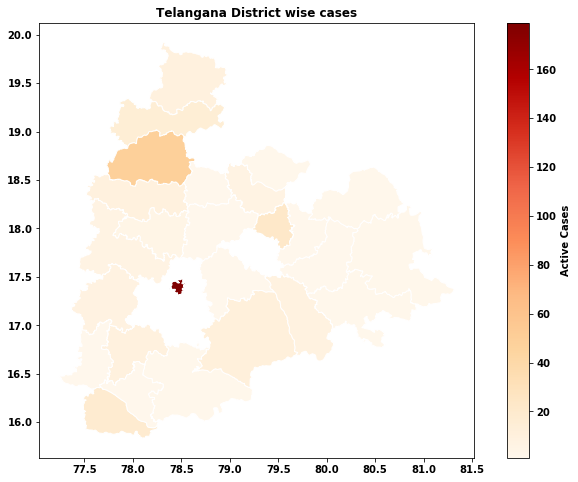

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


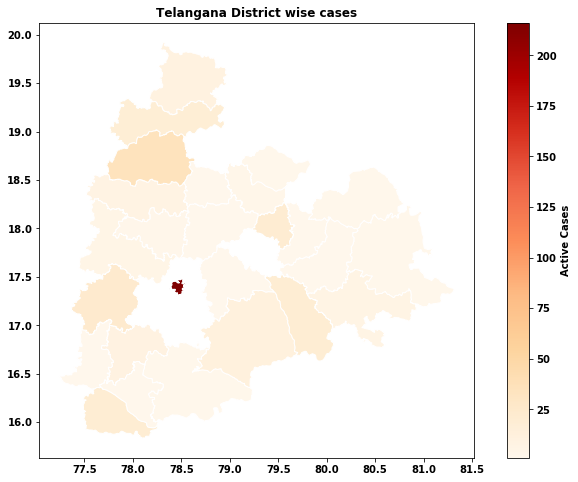

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


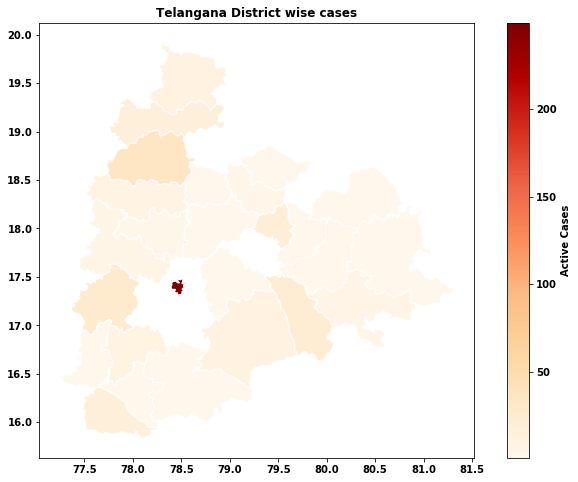

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


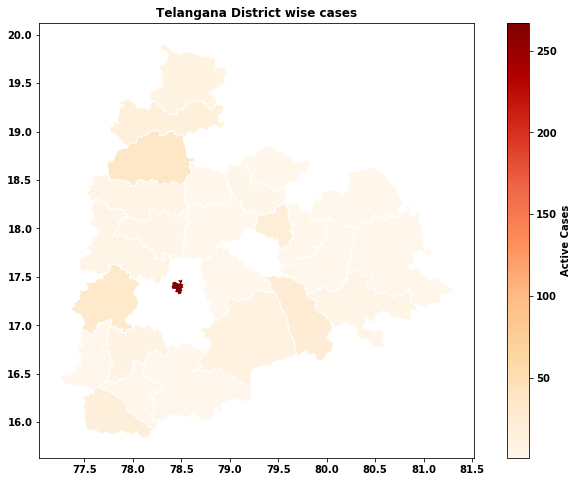

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


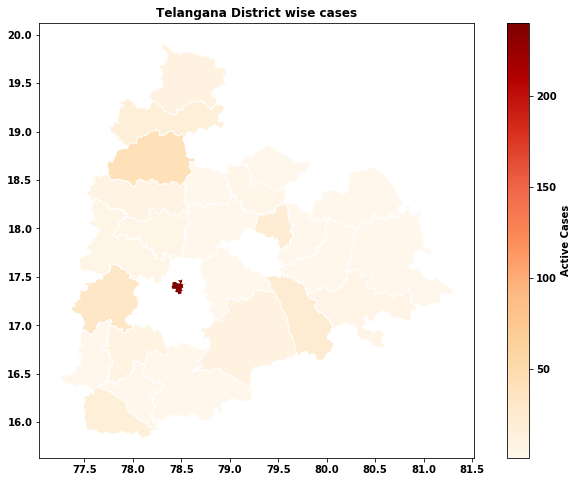

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


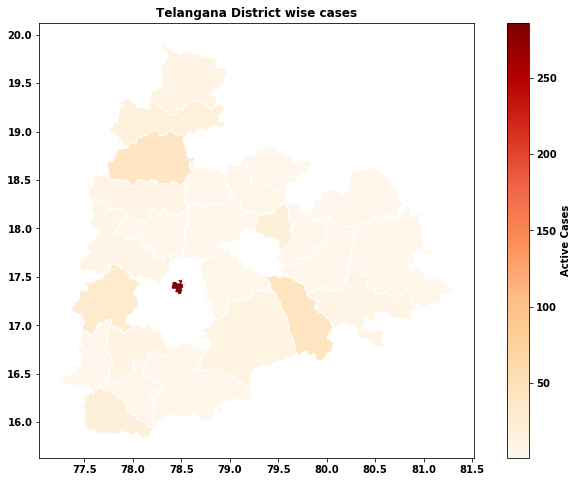

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


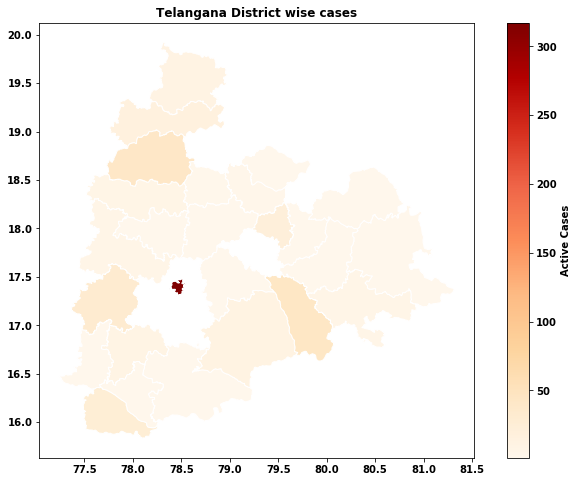

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


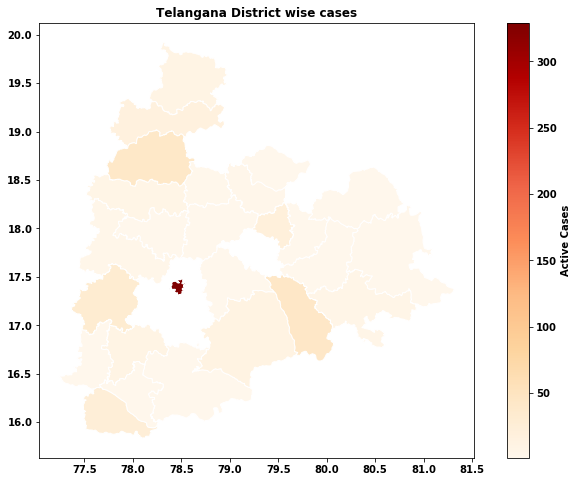

D:\atad_fo_secneics\Anaconda_installed\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


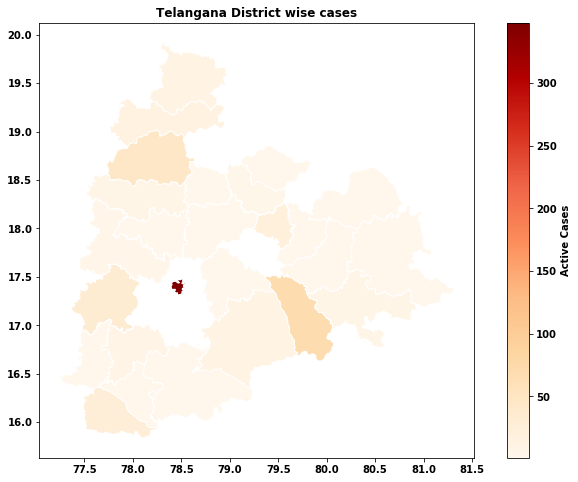

In [233]:
for i in [4,5,6,7,8,9,10,13,14,15,16,17,18,20,21,22]:
    
    #choosing sheet name by day
    sheet=str(i)+'-4'
    
    '''sorting geometry data frame and subsetting 
    District_name and geometry'''
    geo_districts=geo_districts.sort_values('Dist_Name').iloc[:,-2:] 
    
    #reading one day at a time
    dist_wise_cases=pd.read_excel(dist_wise_data,sheet)
    
    dist_wise_cases.fillna(0)
    dist_wise_cases.sort_values('District')
    dist_wise_cases.columns=['Dist_Name','Active Cases']
    
    #merging district wise covid data with  district wise geospacial polygons 
    dist_wise_cases_geo=pd.merge(geo_districts,dist_wise_cases,on='Dist_Name')
    dist_wise_cases_geo.sort_values('Active Cases',ascending=False)
    
    plt.rcParams['figure.figsize']=(12, 8)
    
    #plotting the polygons by choropleth
    dist_wise_cases_geo.plot(column='Active Cases',cmap='OrRd',legend=True,legend_kwds={'label':'Active Cases'},edgecolor='white')
    plt.title('Telangana District wise cases')
    
    #saving one-day frame at a time
    plt.savefig('saved/'+sheet+'.jpg')
    plt.show()

In [239]:
import glob
#helps with making gif out of available day frames
import imageio

In [245]:
images=[]
#adding up the frames as list
for f in glob.glob(r'saved/*'):
    images.append(imageio.imread(f))
#hear it is the final step.
imageio.mimsave('Saved/telangana_dist_gif.gif',images,duration=0.99) #check out the gif at saved !!!